In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [24]:
iris=load_iris()#cargo los datos

In [25]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,train_size=2/3,stratify=iris.target)#separo los datos

In [26]:
clf=DecisionTreeClassifier()#defino el algoritmo

In [27]:
clf.fit(X_train,y_train)# entreno el modelo

DecisionTreeClassifier()

In [28]:
y_test_pred=clf.predict(X_test)#hago la predicion

In [29]:
sc=accuracy_score(y_test_pred,y_test)
print(sc)

0.92


In [30]:
import pandas as pd

In [31]:
juntos = pd.DataFrame(list(zip(y_test_pred, y_test)),columns =['Prediccion', 'Original'])
print(juntos)#zip junta en un iterador y empareja las muestras

    Prediccion  Original
0            2         2
1            0         0
2            0         0
3            1         1
4            0         0
5            2         2
6            2         1
7            1         1
8            1         1
9            1         1
10           1         1
11           1         1
12           2         1
13           0         0
14           1         1
15           0         0
16           1         1
17           2         2
18           2         2
19           2         2
20           1         2
21           0         0
22           2         2
23           0         0
24           0         0
25           0         0
26           0         0
27           1         1
28           2         1
29           2         2
30           1         1
31           1         1
32           2         2
33           1         1
34           2         2
35           0         0
36           2         2
37           2         2
38           0         0


In [32]:
juntos["Diferente"]=0#inserta fila con ceros

In [33]:
for i in range(len(juntos)):
    if(juntos.iloc[i]["Prediccion"]!=juntos.iloc[i]["Original"]):#recorro elementos y los comparo
        juntos.at[i,"Diferente"]=1#pongo en la celda 1

    
        

In [34]:
cantidad=len(juntos)

#agrupa por diferente y los cuenta
df2 = juntos.groupby(["Diferente"])["Diferente"].count()


In [35]:

prop=df2.iloc[0]/cantidad#divido los correctos entre todos
print("La proporcion es de: ",prop)


La proporcion es de:  0.92


In [36]:
confusion_matrix=confusion_matrix(y_test_pred,y_test)#matriz de confusion con los orginales y los de test
print(confusion_matrix)


[[17  0  0]
 [ 0 14  1]
 [ 0  3 15]]


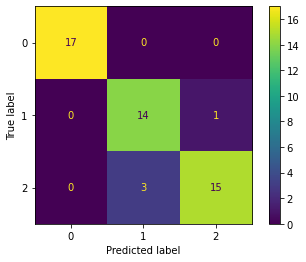

In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.show()

In [ ]:
#fila de arriba: true positives, false positive
#fila de abajo: false negatives, true negative
#false positive: predijo true y era false
#false negative: predijo false y era true